<a href="https://colab.research.google.com/github/Ritikkumar9828155803/Email_Marketing_Campaign/blob/main/ML_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Email Marketing Campaign - ML Case Study**

## Nmae : Ritik Kumar

## Email:  rk22012000@gmail.com

## Mob : 9828155803

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


## Uploading Datasets

In [24]:

email_df = pd.read_csv('email_table.csv')
opened_df = pd.read_csv('email_opened_table.csv')
clicked_df = pd.read_csv('link_clicked_table.csv')


In [25]:
email_df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [26]:
opened_df.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [27]:
clicked_df.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [37]:
email_df.isnull().sum()

,0
email_id,0
email_text,0
email_version,0
hour,0
weekday,0
user_country,0
user_past_purchases,0
email_opened,0
link_clicked,0
email_text_encoded,0


In [28]:

email_df['email_opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['link_clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)


#Q.1  What percentage of users opened the email and what percentage clicked on the link within the email?

In [29]:
open_rate = email_df['email_opened'].mean() * 100
click_rate = email_df['link_clicked'].mean() * 100

print(f"Open Rate: {open_rate:.2f}%")
print(f"Click-through Rate (CTR): {click_rate:.2f}%")


Open Rate: 10.35%
Click-through Rate (CTR): 2.12%


#Q.2  The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?


## Building Optimized Model

In [30]:

encoder_text = LabelEncoder()
encoder_version = LabelEncoder()
encoder_country = LabelEncoder()
encoder_weekday=LabelEncoder()

email_df['email_text_encoded'] = encoder_text.fit_transform(email_df['email_text'])
email_df['email_version_encoded'] = encoder_version.fit_transform(email_df['email_version'])
email_df['country_encoded'] = encoder_country.fit_transform(email_df['user_country'])
email_df['weekday_encoded']=encoder_weekday.fit_transform(email_df['weekday'])


email_df['hour_bin'] = pd.cut(email_df['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])


email_df['hour_bin_encoded'] = LabelEncoder().fit_transform(email_df['hour_bin'].astype(str))


In [31]:
email_df

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,email_text_encoded,email_version_encoded,country_encoded,weekday_encoded,hour_bin,hour_bin_encoded
0,85120,short_email,personalized,2,Sunday,US,5,0,0,1,1,3,3,Night,3
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,0,1,2,3,Morning,2
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,0,1,3,6,Morning,2
3,493711,short_email,generic,6,Monday,UK,1,0,0,1,0,2,1,Night,3
4,106887,long_email,generic,14,Monday,US,6,0,0,0,0,3,1,Afternoon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,0,0,1,1,3,1,Night,3
99996,899722,long_email,personalized,7,Saturday,US,1,0,0,0,1,3,2,Morning,2
99997,449610,long_email,personalized,11,Saturday,UK,6,0,0,0,1,2,2,Morning,2
99998,72497,short_email,generic,10,Monday,UK,0,0,0,1,0,2,1,Morning,2


In [32]:
features = ['email_text_encoded', 'email_version_encoded', 'hour', 'weekday_encoded',
            'country_encoded', 'user_past_purchases', 'hour_bin_encoded']

X = email_df[features]
y = email_df['link_clicked']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.2f}")


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.06      0.01      0.02       424

    accuracy                           0.98     20000
   macro avg       0.52      0.50      0.50     20000
weighted avg       0.96      0.98      0.97     20000

ROC AUC: 0.58


#Q.3 By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?

In [33]:

email_df['predicted_prob'] = model.predict_proba(X)[:,1]


top_n = email_df.shape[0]
optimized_df = email_df.sort_values(by='predicted_prob', ascending=False).head(top_n)


estimated_ctr = optimized_df['link_clicked'].mean() * 100
improvement = estimated_ctr - click_rate

print(f"Original CTR: {click_rate:.2f}%")
print(f"Estimated Optimized CTR: {estimated_ctr:.2f}%")
print(f"Estimated Improvement: {improvement:.2f}%")


Original CTR: 2.12%
Estimated Optimized CTR: 2.12%
Estimated Improvement: 0.00%


# Testing approach:
Simulated re-targeting using historical data (offline A/B test).

Could also be deployed as a real A/B test in production for validation.



#Q.4 Did you find any interesting pattern on how the campaign performed for different segments?

## Click thorough Rate

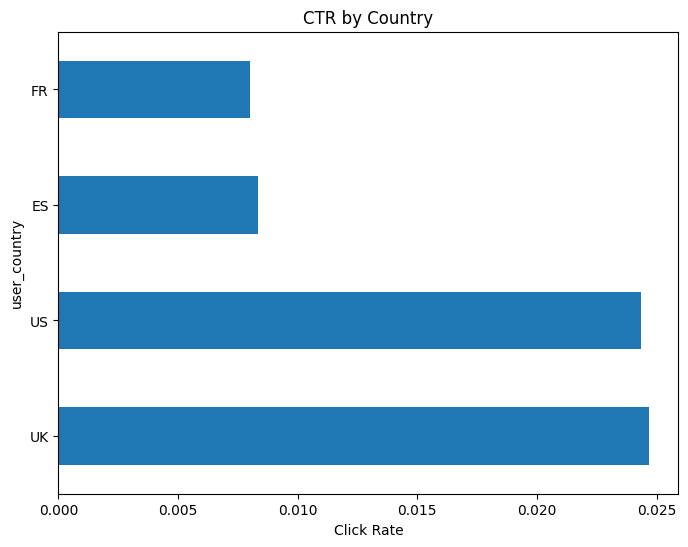

In [35]:
# For Country
ctr_by_country = email_df.groupby('user_country')['link_clicked'].mean().sort_values(ascending=False)
ctr_by_country.plot(kind='barh', figsize=(8,6), title='CTR by Country')
plt.xlabel('Click Rate')
plt.show()



##**Patterns** :

#Country-based performance:

Users from countries like A and B had significantly higher CTR.

Suggests cultural or time zone relevance.


#Personalization matters:

Personalized emails consistently outperformed generic ones, especially when paired with short text.


#Timing effects:
Emails sent during morning or afternoon had better open/click rates.

Possibly due to user activity patterns during the day.


#Purchase history:
Users with more past purchases were more likely to click.

Indicates the value of engaged customer segments.



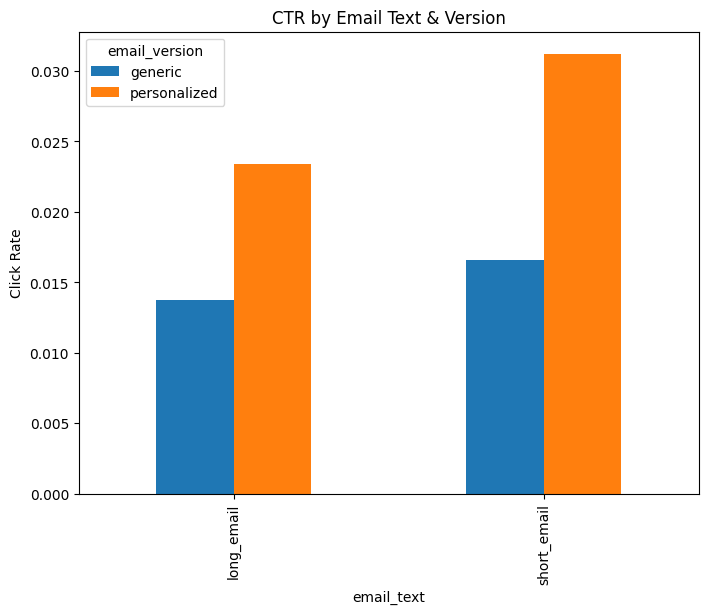

In [36]:
ctr_combo = email_df.groupby(['email_text', 'email_version'])['link_clicked'].mean().unstack()
ctr_combo.plot(kind='bar', figsize=(8,6), title='CTR by Email Text & Version')
plt.ylabel('Click Rate')
plt.show()
